# 🌿 🧮 Complete Guide to Descriptive Stats A to Z

Welcome to this comprehensive guide on descriptive statistics, designed to equip you with the knowledge and skills to summarize and explore data effectively. Whether you're a budding data scientist or a seasoned professional looking to refine your data analysis skills, this notebook is tailored for you!

## What Will You Learn?

In this guide, we will explore various methods to describe and analyze data, ensuring you have the tools to confidently tackle any data-driven challenge. Here's what we'll cover:

- **Use Frequency Table and Mode for Categorical Variables:** Learn how to generate frequency tables and calculate the mode for categorical data.
- **Use Basic and Advanced Statistics for Continuous Variables:** Understand and calculate basic statistics like mean, median, and standard deviation, as well as advanced statistics such as skewness, kurtosis, and confidence intervals for means.
- **Create Cross-Tabulation for Categorical Variables:** Explore the relationships between categorical variables through cross-tabulation.
- **Create Pivot Table for Categorical and Continuous Variables:** Master the use of pivot tables to summarize data involving both categorical and continuous variables.

## Why This Guide?

- **Step-by-Step Tutorials:** Each section includes clear explanations followed by practical examples, ensuring you not only learn but also apply your knowledge.
- **Interactive Learning:** Engage with interactive code cells that allow you to see the effects of descriptive statistics in real-time.

### How to Use This Notebook

- **Run the Cells:** Follow along with the code examples by running the cells yourself. Modify the parameters to see how the results change.
- **Explore Further:** After completing the guided sections, try applying the methods to your own datasets to reinforce your learning.

Prepare to unlock the full potential of descriptive statistics in data analysis. Let's dive in and transform data into insights!


## Types of Structured Data

1. **Numeric Data**:
    - **Continuous**: Data that can take any value within an interval (e.g., wind speed).
    - **Discrete**: Data that can only take integer values (e.g., event counts).


2. **Categorical Data**:
    - **Nominal**: Data that represents categories without a specific order (e.g., types of TV screens, state names).
    - **Binary**: A special case of nominal data with just two categories (e.g., 0/1, true/false).
    - **Ordinal**: Categorical data with an intrinsic order (e.g., numerical ratings like 1, 2, 3, 4, or 5).


### Importance of Data Types

Understanding data types is crucial for selecting the appropriate methods for visualization, analysis, and modeling. Different data types require different statistical treatments and influence how software handles computations.


## Rectangular Data

The fundamental data structure in data science is a rectangular matrix, like a spreadsheet or database table, where rows represent records and columns represent features (variables).

### Key Terms for Rectangular Data
- **Data Frame**: A two-dimensional matrix.
- **Feature**: A column in a data frame (synonyms: attribute, input, predictor, variable).
- **Outcome**: The variable to be predicted (synonyms: dependent variable, response, target, output).
- **Record**: A row in a data frame (synonyms: case, example, instance, observation, pattern, sample).

## Terminology Differences

Understanding the terminology used for rectangular data can be challenging, as it varies across disciplines. Statisticians and data scientists often use different terms to refer to the same concepts. 

- **Statisticians**: 
  - Use the term **predictor variables** to describe the inputs used in a model to forecast a **response** or **dependent variable**.
  
  
- **Data Scientists**: 
  - Refer to these inputs as **features**, which are used to predict a **target**.


A particularly confusing term is **sample**:
- **Computer Scientists**: 
  - Use the term **sample** to refer to a single row of data.
  
  
- **Statisticians**: 
  - Consider a **sample** to mean a collection of multiple rows of data.

Recognizing these differences is crucial for effective communication and understanding in data science and related fields.


# Loading and Exploring the Dataset

In this section, we will load the dataset and perform an initial exploration to understand its structure and contents. This step is crucial for any data analysis task as it helps in identifying the types of variables, their distributions, and any potential issues such as missing values.

The dataset we are using is `Sales_without_NaNs_v1.3.csv`. Let's start by loading the dataset and displaying the first few rows to get an overview.

### Code to Load and Explore the Dataset

We'll use the pandas library to load the dataset and perform some basic exploratory data analysis (EDA). Specifically, we'll:
1. Load the dataset.
2. Display the first few rows.
3. Get basic information about the dataset, including the number of rows and columns, data types, and memory usage.
4. Generate summary statistics for the numerical columns.


In [1]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('/kaggle/input/sales-and-satisfaction/Sales_without_NaNs_v1.3.csv')

# Display the first few rows
print("First few rows of the dataset:")
display(df.head())

# Basic information about the dataset
print("\nBasic information about the dataset:")
df.info()

# Summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
display(df.describe())


First few rows of the dataset:


,Group,Customer_Segment,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After,Purchase_Made
0,Control,High Value,240.548359,300.007568,74.684767,74.093658,No
1,Treatment,High Value,246.862114,381.337555,100.000000,100.000000,Yes
2,Control,High Value,156.978084,179.330464,98.780735,100.000000,No
3,Control,Medium Value,192.126708,229.278031,49.333766,39.811841,Yes
4,Control,High Value,229.685623,270.167701,83.974852,87.738591,Yes



Basic information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Group                         10000 non-null  object 
 1   Customer_Segment              10000 non-null  object 
 2   Sales_Before                  10000 non-null  float64
 3   Sales_After                   10000 non-null  float64
 4   Customer_Satisfaction_Before  10000 non-null  float64
 5   Customer_Satisfaction_After   10000 non-null  float64
 6   Purchase_Made                 10000 non-null  object 
dtypes: float64(4), object(3)
memory usage: 547.0+ KB

Summary statistics for numerical columns:


,Sales_Before,Sales_After,Customer_Satisfaction_Before,Customer_Satisfaction_After
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,203.846220,280.378330,70.249026,73.921449
std,55.431215,85.463933,16.927639,18.185050
min,24.852966,32.414352,22.202441,18.224938
25%,166.610755,221.438134,56.348229,59.866027
50%,203.347924,273.599150,69.644307,73.708858
75%,239.220116,332.376500,83.318174,90.403099
max,545.422547,818.219997,100.000000,100.000000


In [2]:
# Calculate percentages for categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
continuous_cols = df.select_dtypes(include=['float64']).columns
category_percentages = {}

for col in categorical_cols:
    category_percentages[col] = df[col].value_counts(normalize=True) * 100

for col, percentages in category_percentages.items():
    print(f"Percentages for {col}:")
    for category, percent in percentages.items():
        print(f"  {category}: {percent:.2f}%")
    print("\n")


Percentages for Group:
  Control: 50.13%
  Treatment: 49.87%


Percentages for Customer_Segment:
  Medium Value: 33.55%
  Low Value: 33.54%
  High Value: 32.91%


Percentages for Purchase_Made:
  Yes: 50.76%
  No: 49.24%




# Dataset Description Based on First Step:

Below is a detailed description of each column in the dataset:

1. **Group**
   - **Type**: Categorical
   - **Description**: Indicates the group to which the data entry belongs.
   - **Categories and Percentages**:
     - Control: 50.13%
     - Treatment: 49.87%


2. **Customer_Segment**
   - **Type**: Categorical
   - **Description**: Represents the segment of customers.
   - **Categories and Percentages**:
     - Medium Value: 33.55%
     - Low Value: 33.54%
     - High Value: 32.91%


3. **Sales_Before**
   - **Type**: Numerical (float)
   - **Description**: The amount of sales recorded before a certain event or time period. This column measures the sales performance before any changes or interventions were applied.
   - **Summary Statistics**:
     - **Mean**: 203.85
     - **Standard Deviation**: 55.43
     - **Minimum**: 24.85
     - **25th Percentile**: 166.61
     - **Median**: 203.35
     - **75th Percentile**: 239.22
     - **Maximum**: 545.42


4. **Sales_After**
   - **Type**: Numerical (float)
   - **Description**: The amount of sales recorded after a certain event or time period. This column measures the sales performance after any changes or interventions were applied.
   - **Summary Statistics**:
     - **Mean**: 280.38
     - **Standard Deviation**: 85.46
     - **Minimum**: 32.41
     - **25th Percentile**: 221.44
     - **Median**: 273.60
     - **75th Percentile**: 332.38
     - **Maximum**: 818.22


5. **Customer_Satisfaction_Before**
   - **Type**: Numerical (float)
   - **Description**: The level of customer satisfaction before a certain event or time period, measured on a scale (e.g., 0-100). This column captures customer sentiments before any changes or interventions were applied.
   - **Summary Statistics**:
     - **Mean**: 70.25
     - **Standard Deviation**: 16.93
     - **Minimum**: 22.20
     - **25th Percentile**: 56.35
     - **Median**: 69.64
     - **75th Percentile**: 83.32
     - **Maximum**: 100.00


6. **Customer_Satisfaction_After**
   - **Type**: Numerical (float)
   - **Description**: The level of customer satisfaction after a certain event or time period, measured on a scale (e.g., 0-100). This column captures customer sentiments after any changes or interventions were applied.
   - **Summary Statistics**:
     - **Mean**: 73.92
     - **Standard Deviation**: 18.19
     - **Minimum**: 18.22
     - **25th Percentile**: 59.87
     - **Median**: 73.71
     - **75th Percentile**: 90.40
     - **Maximum**: 100.00


7. **Purchase_Made**
   - **Type**: Categorical
   - **Description**: Indicates whether a purchase was made. This could be a binary variable (e.g., Yes/No) indicating the occurrence of a purchase.
   - **Categories and Percentages**:
     - Yes: 50.76%
     - No: 49.24%



# Use Frequency Table and Mode for Categorical Variables

In this section, we will learn how to generate frequency tables and calculate the mode for categorical data. Frequency tables help us understand the distribution of categorical variables, while the mode represents the most frequently occurring category in the data.

We will create a frequency table for each categorical column, which includes the category name, frequency, and percentage. Additionally, we will calculate the mode for each categorical column.




In [3]:
# Iterate over each categorical column to generate frequency tables and calculate the mode
for col in categorical_cols:
    # Print the header for the frequency table
    print(f"Frequency Table for {col}:")

    # Create a frequency table
    frequency_table = df[col].value_counts().reset_index()

    # Rename the columns for better readability
    frequency_table.columns = [col, 'Frequency']

    # Set the category names as the index
    frequency_table.set_index(col, inplace=True)

    # Calculate the percentage for each category
    frequency_table['Percentage'] = (frequency_table['Frequency'] / len(df)) * 100

    # Print the frequency table
    print(frequency_table)
    print("\n")

    # Calculate the mode of the column
    mode_value = df[col].mode()[0]

    # Print the mode of the column
    print(f"Mode for {col}: {mode_value}\n")


Frequency Table for Group:
           Frequency  Percentage
Group                           
Control         5013       50.13
Treatment       4987       49.87


Mode for Group: Control

Frequency Table for Customer_Segment:
                  Frequency  Percentage
Customer_Segment                       
Medium Value           3355       33.55
Low Value              3354       33.54
High Value             3291       32.91


Mode for Customer_Segment: Medium Value

Frequency Table for Purchase_Made:
               Frequency  Percentage
Purchase_Made                       
Yes                 5076       50.76
No                  4924       49.24


Mode for Purchase_Made: Yes



# Use Basic and Advanced Statistics for Continuous Variables

In this section, we will understand and calculate basic statistics like mean, median, and standard deviation, as well as advanced statistics such as skewness, kurtosis, and confidence intervals for means. These statistics provide valuable insights into the distribution and variability of continuous data.

### Basic Statistics
Basic statistics provide a summary of the central tendency and dispersion of the data. These include:
- **Mean**: The average value of the data.
- **Median**: The middle value of the data when it is sorted.
- **Standard Deviation**: A measure of the amount of variation or dispersion in the data.

### Advanced Statistics
Advanced statistics offer deeper insights into the shape and spread of the data distribution. These include:
- **Skewness**: A measure of the asymmetry of the data distribution.
- **Kurtosis**: A measure of the "tailedness" of the data distribution.
- **Confidence Intervals for Means**: An estimated range of values which is likely to include the population mean with a certain level of confidence.



In [4]:
from scipy import stats

# Iterate over each continuous column to calculate 
for col in continuous_cols:
    # Calculate basic statistics
    mean_value = df[col].mean()
    median_value = df[col].median()
    std_dev_value = df[col].std()

    # Calculate advanced statistics
    skewness_value = df[col].skew()
    kurtosis_value = df[col].kurtosis()

    # Calculate 95% confidence interval for the mean
    # The confidence interval is calculated using the mean and the standard error of the mean (SEM)
    confidence_interval = stats.norm.interval(0.95, loc=mean_value, scale=stats.sem(df[col]))

    # Print the statistics
    print(f"Statistics for {col}:")
    print(f"  Mean: {mean_value}")
    print(f"  Median: {median_value}")
    print(f"  Standard Deviation: {std_dev_value}")
    print(f"  Skewness: {skewness_value}")
    print(f"  Kurtosis: {kurtosis_value}")
    print(f"  95% Confidence Interval for the Mean: {confidence_interval}\n")


Statistics for Sales_Before:
  Mean: 203.84622026439385
  Median: 203.34792402783143
  Standard Deviation: 55.43121460422004
  Skewness: 0.21193160272524755
  Kurtosis: 0.40194726110312606
  95% Confidence Interval for the Mean: (202.75978842195804, 204.93265210682966)

Statistics for Sales_After:
  Mean: 280.37832970452365
  Median: 273.5991504627984
  Standard Deviation: 85.46393288058938
  Skewness: 0.4457375397986008
  Kurtosis: 0.5233577519974584
  95% Confidence Interval for the Mean: (278.7032674002926, 282.0533920087547)

Statistics for Customer_Satisfaction_Before:
  Mean: 70.24902619495934
  Median: 69.64430685736563
  Standard Deviation: 16.927638569575947
  Skewness: 0.11340992132610195
  Kurtosis: -0.906647907776351
  95% Confidence Interval for the Mean: (69.91725057556255, 70.58080181435614)

Statistics for Customer_Satisfaction_After:
  Mean: 73.92144864705271
  Median: 73.70885810534467
  Standard Deviation: 18.185049732027085
  Skewness: -0.10735431655244952
  Kurtosi

## Analysis of Statistics

### Sales_Before
- **Skewness:** 0.21 (slightly right-skewed)
- **Kurtosis:** 0.40 (light-tailed distribution)

### Sales_After
- **Skewness:** 0.45 (moderately right-skewed)
- **Kurtosis:** 0.52 (light-tailed distribution)


### Customer_Satisfaction_Before
- **Skewness:** 0.11 (nearly symmetric)
- **Kurtosis:** -0.91 (platykurtic, flat distribution)


### Customer_Satisfaction_After
- **Skewness:** -0.11 (nearly symmetric)
- **Kurtosis:** -0.95 (platykurtic, flat distribution)

### Key Observations
1. **Sales_Before vs. Sales_After**: 
   - The mean sales increased from 203.85 to 280.38, indicating a significant rise in sales after the intervention.
   - The distribution of sales data became more right-skewed after the intervention, suggesting a greater increase in higher sales values.
   - The standard deviation also increased, indicating more variability in sales after the intervention.
   
   

2. **Customer_Satisfaction_Before vs. Customer_Satisfaction_After**:
   - The mean customer satisfaction increased from 70.25 to 73.92, showing an improvement in customer satisfaction levels.
   - Both distributions are nearly symmetric and flat, indicating that customer satisfaction scores were evenly spread around the mean with no extreme values.




# Create Cross-Tabulation for Categorical Variables

Cross-tabulation, also known as contingency table analysis, is a method to quantitatively analyze the relationship between multiple categorical variables. This table displays the distribution of one categorical variable across the levels of another categorical variable, allowing us to explore potential associations and interactions between these variables.

In this section, we will create cross-tabulations to explore the relationships between different categorical variables in our dataset.


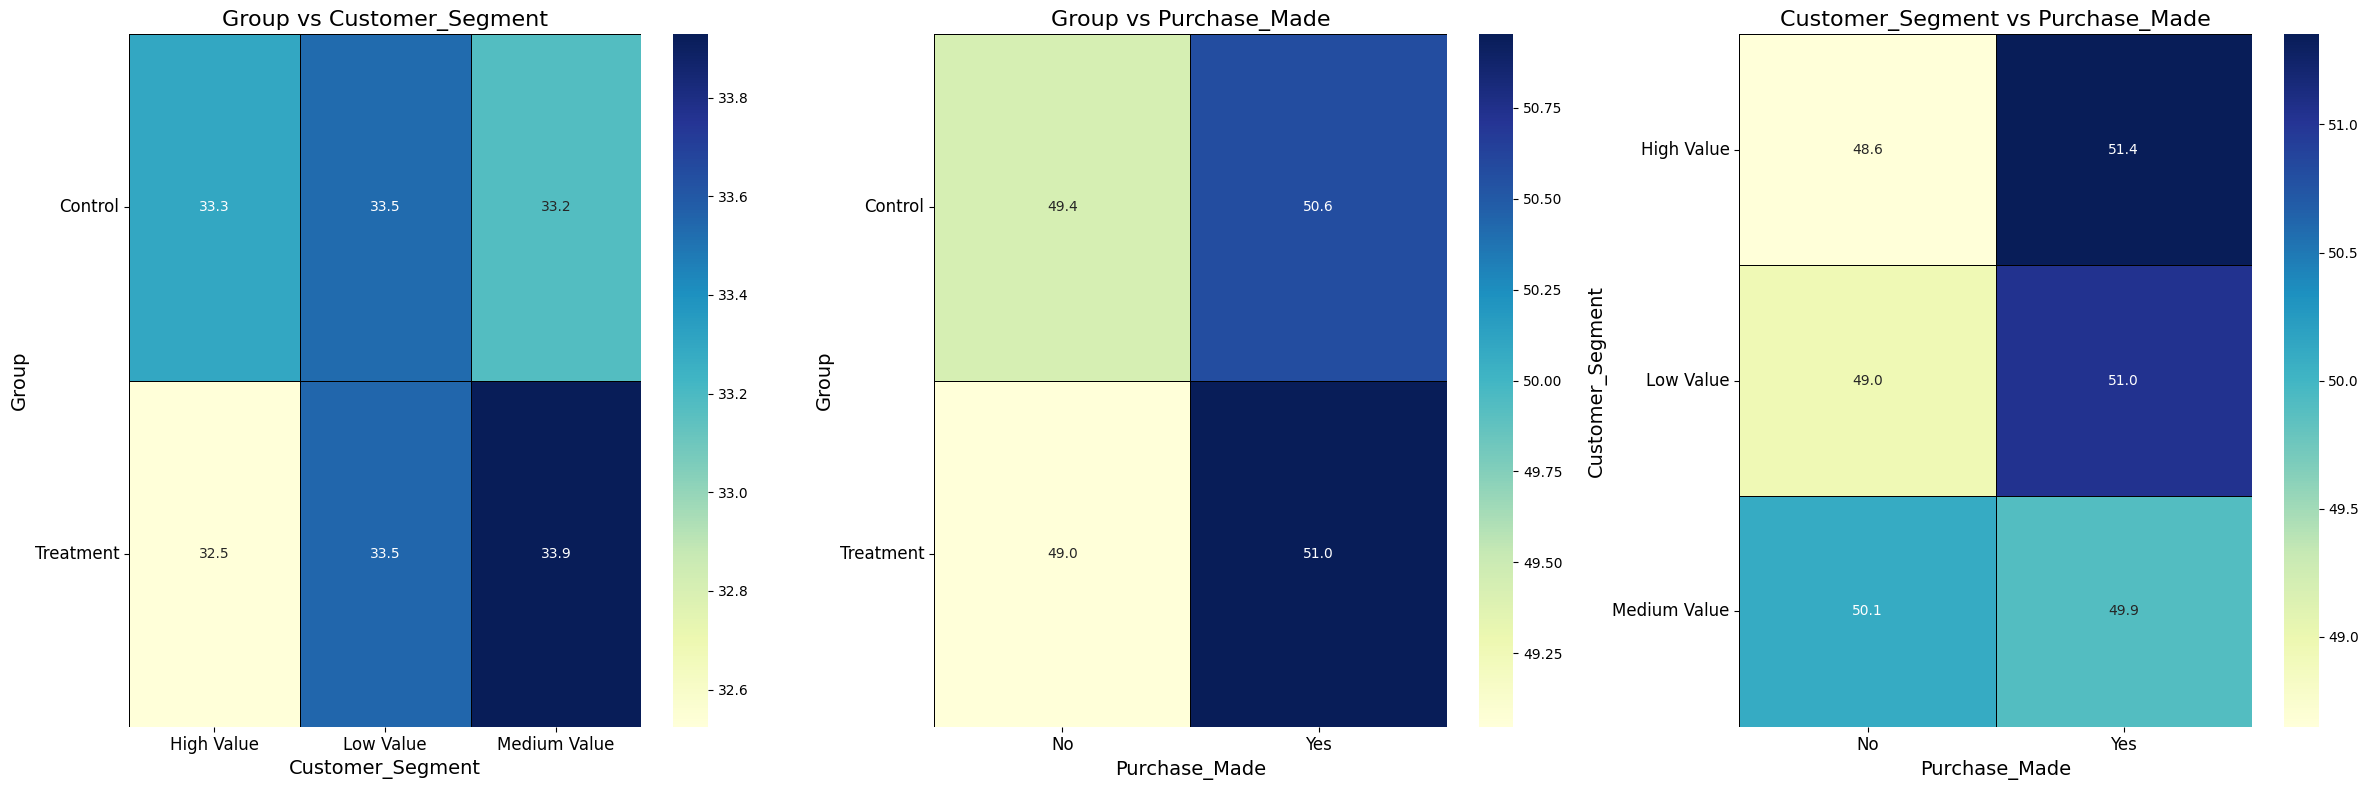

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to plot heatmap for cross-tabulation
def plot_crosstab_heatmap(df, col1, col2, ax):
    cross_tab = pd.crosstab(df[col1], df[col2], normalize='index') * 100
    sns.heatmap(cross_tab, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='black', ax=ax)
    ax.set_title(f"{col1} vs {col2}", fontsize=16)
    ax.set_xlabel(col2, fontsize=14)
    ax.set_ylabel(col1, fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12, rotation=0)

# Plot all heatmaps in a single row
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Generate cross-tabulations and plot heatmaps for each pair of categorical variables
pairs = [(categorical_cols[i], categorical_cols[j]) for i in range(len(categorical_cols)) for j in range(i + 1, len(categorical_cols))]
for idx, (col1, col2) in enumerate(pairs[:3]):
    plot_crosstab_heatmap(df, col1, col2, axes[idx])

plt.tight_layout()
plt.show()


# Create Pivot Table for Categorical and Continuous Variables

Pivot tables are a powerful tool in data analysis that allow you to summarize, aggregate, and manipulate data across multiple dimensions. They are particularly useful for summarizing data involving both categorical and continuous variables.

In this section, we will create pivot tables to summarize data involving both categorical and continuous variables in our dataset and visualize them using heatmaps for a more visually appealing presentation.


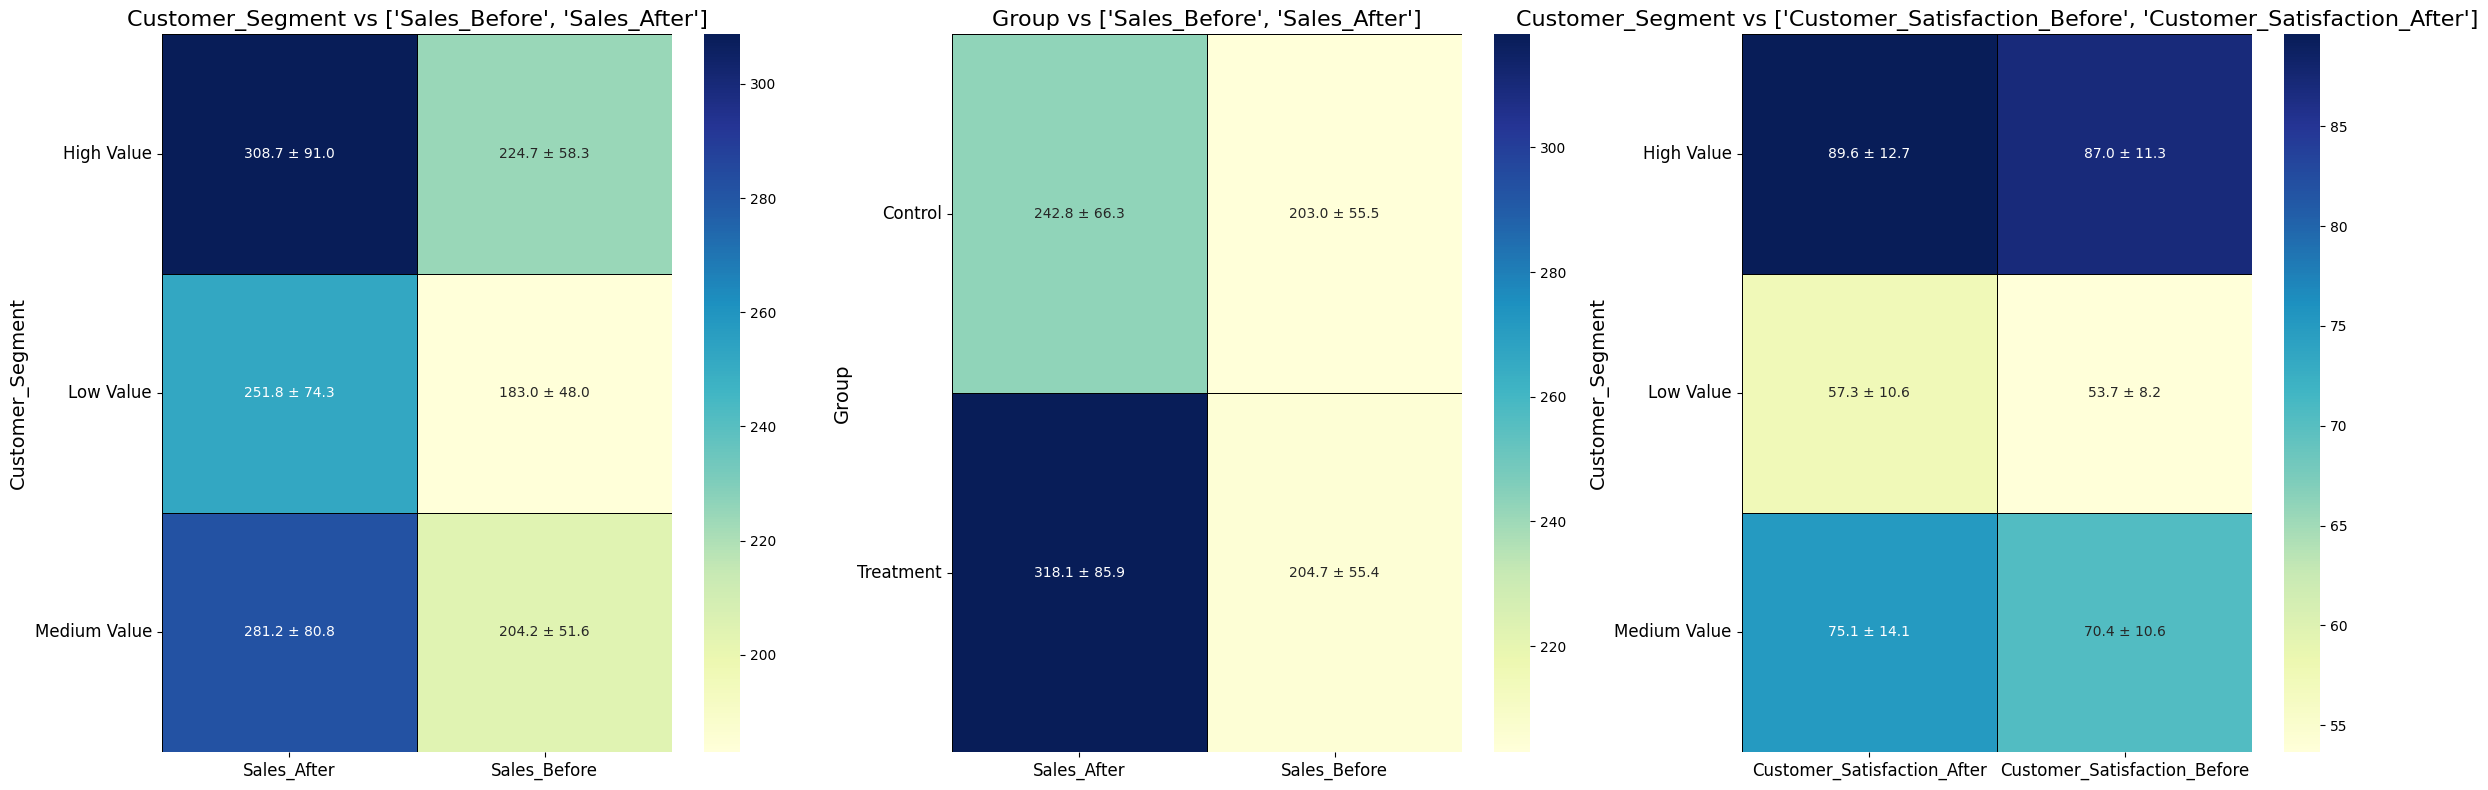

In [6]:
# Function to plot heatmap for pivot table
def plot_pivot_table_heatmap(df, index_col, value_cols, ax):
    mean_pivot = pd.pivot_table(df, values=value_cols, index=index_col, aggfunc='mean')
    std_pivot = pd.pivot_table(df, values=value_cols, index=index_col, aggfunc='std')
    
    # Plot heatmap for mean values
    sns.heatmap(mean_pivot, annot=True, fmt=".1f", cmap="YlGnBu", cbar=True, linewidths=0.5, linecolor='black', ax=ax)
    
    # Annotate with mean ± std
    for text in ax.texts:
        value = text.get_text()
        row, col = int(text.get_position()[1]), int(text.get_position()[0])
        text.set_text(f"{mean_pivot.iloc[row, col]:.1f} ± {std_pivot.iloc[row, col]:.1f}")
    
    ax.set_title(f"{index_col} vs {value_cols}", fontsize=16)
    ax.set_ylabel(index_col, fontsize=14)
    ax.tick_params(axis='x', labelsize=12)
    ax.tick_params(axis='y', labelsize=12, rotation=0)

# Choose complex pairs of categorical and continuous variables
chosen_pairs = [
    ('Customer_Segment', ['Sales_Before', 'Sales_After']),
    ('Group', ['Sales_Before', 'Sales_After']),
    ('Customer_Segment', ['Customer_Satisfaction_Before', 'Customer_Satisfaction_After'])
]

# Plot pivot tables and heatmaps for the chosen pairs
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

for idx, (index_col, value_cols) in enumerate(chosen_pairs):
    plot_pivot_table_heatmap(df, index_col, value_cols, axes[idx])

plt.tight_layout()
plt.show()


# For Further Analysis

If you are interested in further statistical testing, I highly recommend checking out the [Complete Guide to Statistical Testing A to Z](https://www.kaggle.com/code/matinmahmoudi/complete-guide-to-statistical-testing-a-to-z). This comprehensive guide covers a variety of statistical tests, providing in-depth explanations and practical examples to help you confidently tackle any data-driven challenge.

